# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import cv2

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file = "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results


print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))

# TODO: Number of training examples
n_train = len(X_train)
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train) + 1

print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

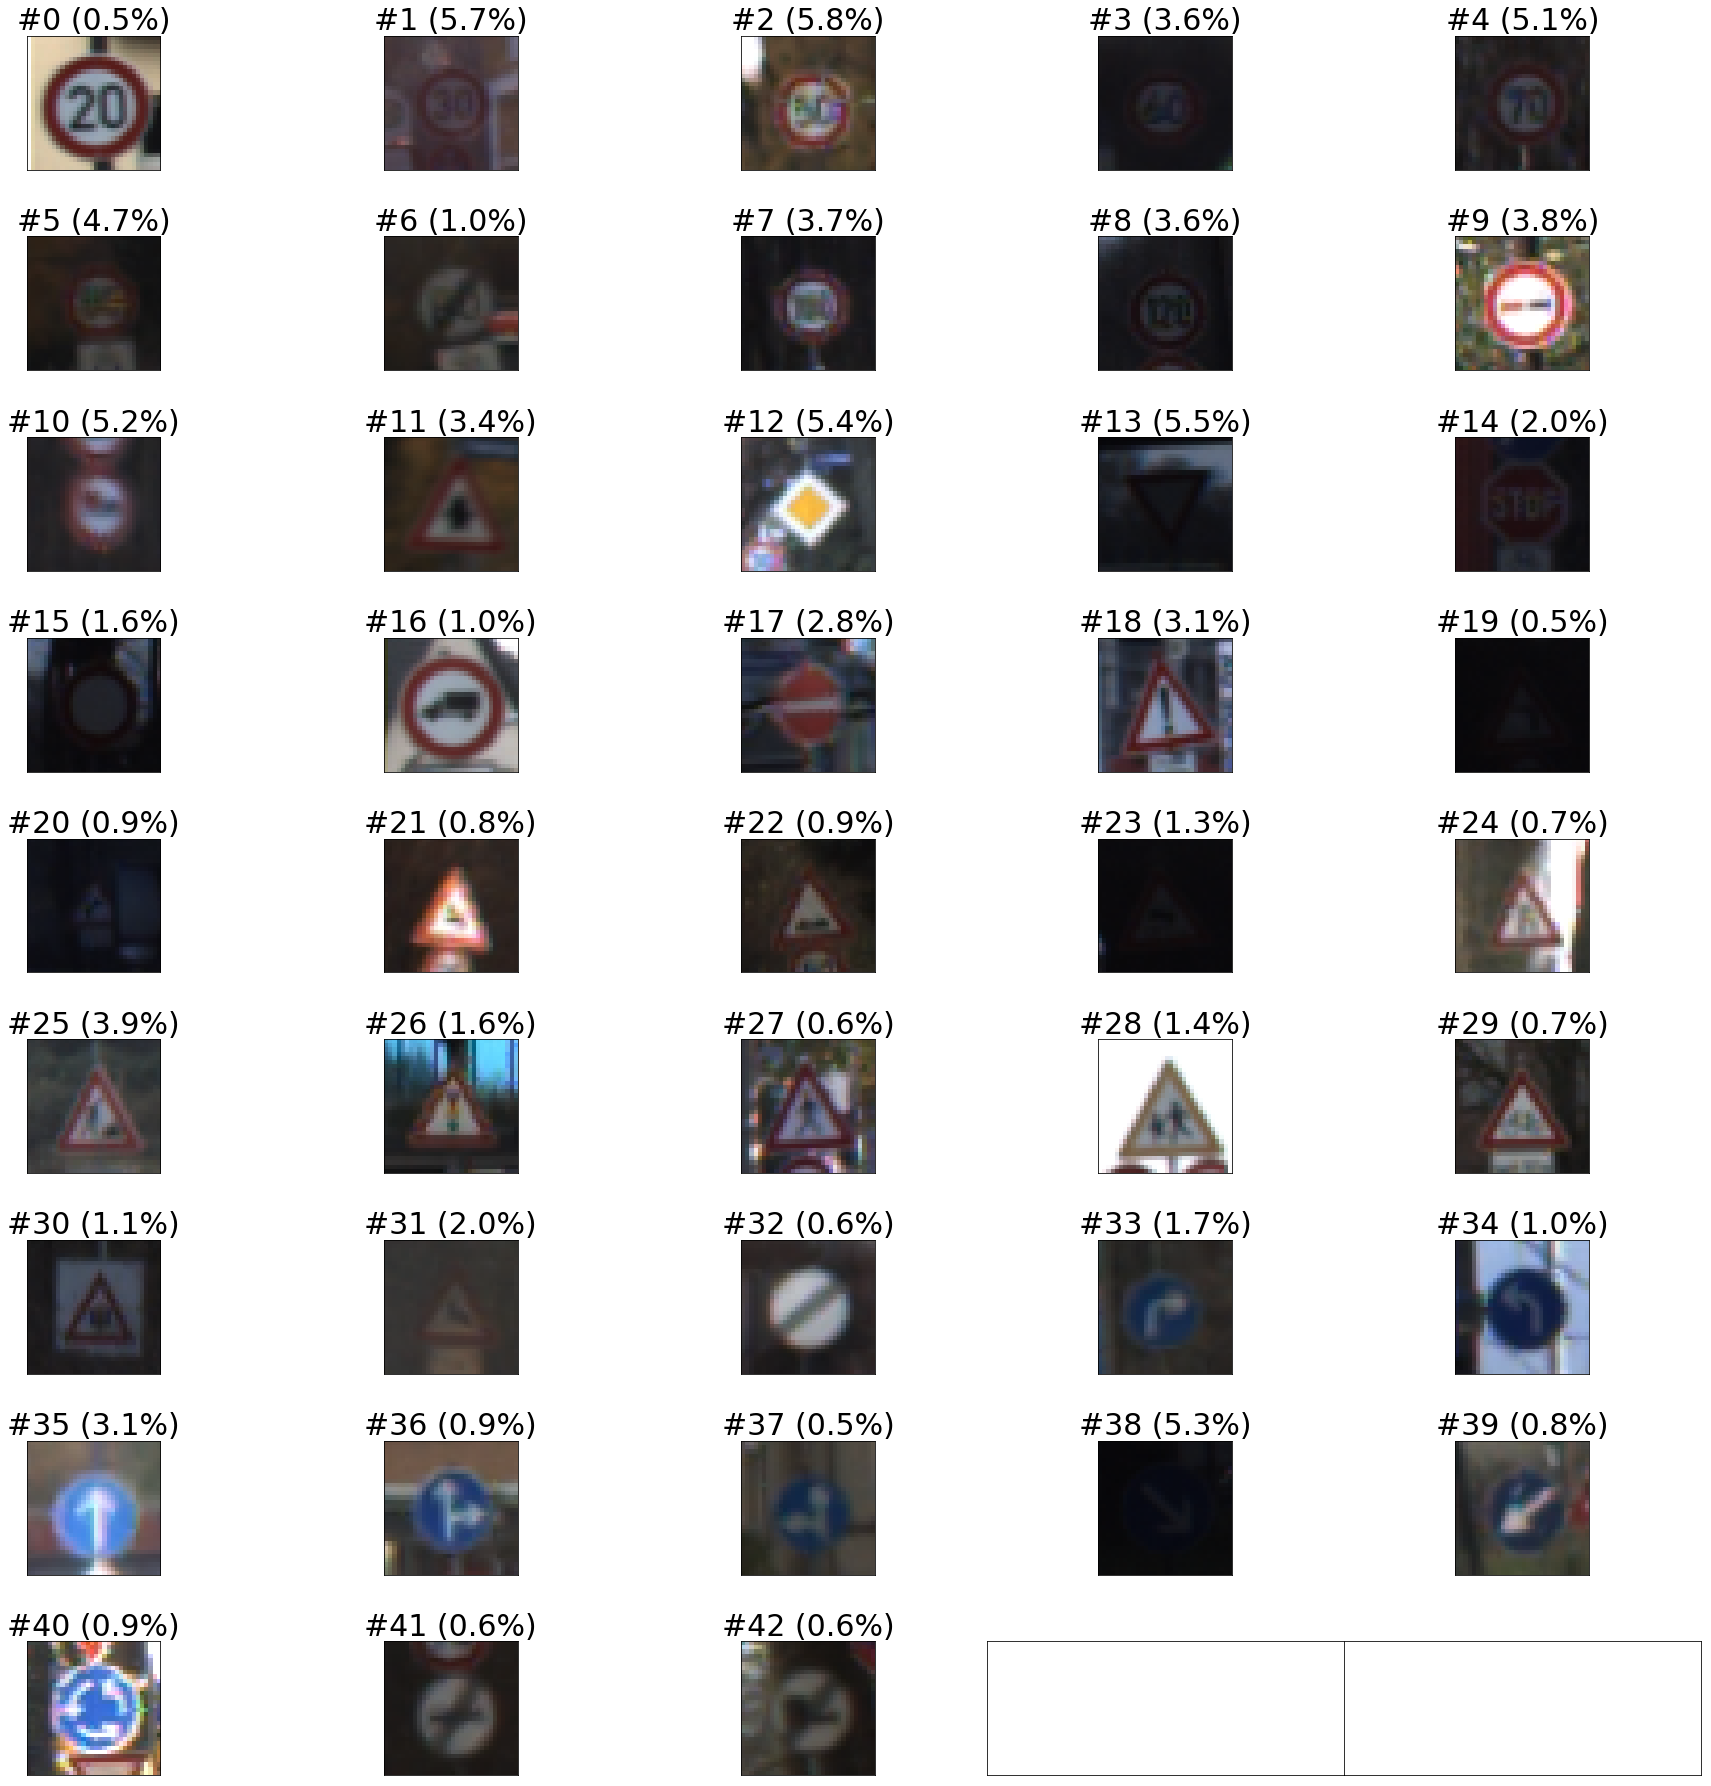

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams.update({'figure.max_open_warning': 0})
# Visualizations will be shown in the notebook.
%matplotlib inline

fs = 30  # fontsize

#Bincount the training set to generate percentage values
count = np.bincount(y_train)

fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(32, 32))

for k in range(0, n_classes):
    index = np.where(y_train==k)
    index = int(index[0][0])
    image = X_train[index].squeeze()

    row = int(k/5)
    col = k%5
    
    axes[row, col].imshow(image, cmap="gray")
    
    training_freq_percent = ((count[k] /  n_train) * 100)
    title = ("#{} ({:.1f}%)".format(y_train[index], training_freq_percent))
    axes[row, col].set_title(title, fontsize=fs)

    for ax in axes.flatten():
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
fig.subplots_adjust(wspace=0.001, hspace=0.5)

plt.show()


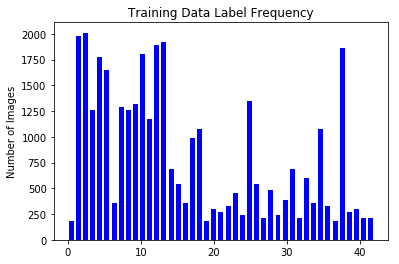

In [4]:
# Get histogram of label frequency (Training Data)
values, bin_edges = np.histogram(y_train, bins=n_classes)
%matplotlib inline
fig, ax = plt.subplots()
centers = (bin_edges[:-1] + bin_edges[1:]) / 2
width = ((bin_edges[1] - bin_edges[0]) * 0.70)
ax.bar(centers, values, color="blue",align='center',width=width)
ax.set_ylabel('Number of Images')
ax.set_title('Training Data Label Frequency')

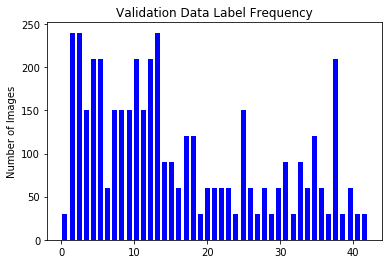

In [5]:
# Get histogram of label frequency (Validation Data)
values, bin_edges = np.histogram(y_valid, bins=n_classes)
%matplotlib inline
fig, ax = plt.subplots()
centers = (bin_edges[:-1] + bin_edges[1:]) / 2
width = ((bin_edges[1] - bin_edges[0]) * 0.70)
ax.bar(centers, values, color="blue",align='center',width=width)
ax.set_ylabel('Number of Images')
ax.set_title('Validation Data Label Frequency')

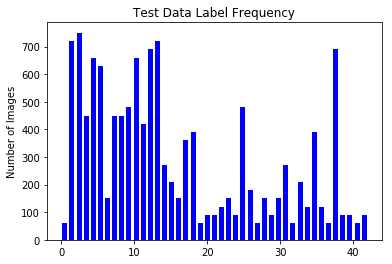

In [6]:
# Get histogram of label frequency (Test Data)
values, bin_edges = np.histogram(y_test, bins=n_classes)
%matplotlib inline
fig, ax = plt.subplots()
centers = (bin_edges[:-1] + bin_edges[1:]) / 2
width = ((bin_edges[1] - bin_edges[0]) * 0.70)
ax.bar(centers, values, color="blue",align='center',width=width)
ax.set_ylabel('Number of Images')
ax.set_title('Test Data Label Frequency')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Image ClassId = 5
Original Image shape = (32, 32, 3)
Grayscale Image shape = (32, 32, 1)


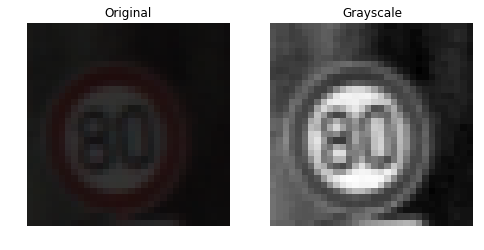

In [7]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import random
from sklearn.utils import shuffle

#Grayscale Processing
X_train_gray = np.mean(X_train, axis=3)
X_valid_gray = np.mean(X_valid, axis=3)
X_test_gray = np.mean(X_test, axis=3)

X_train_gray = np.expand_dims(X_train_gray, axis=3)
X_valid_gray = np.expand_dims(X_valid_gray, axis=3)
X_test_gray = np.expand_dims(X_test_gray, axis=3)


#Confirm Image Grayscale and Shape
%matplotlib inline
index = random.randint(0, len(X_train_gray))

print("Image ClassId =", y_train[index])

image_shape = X_train[0].shape
print("Original Image shape =", image_shape)

image_shape_gray = X_train_gray[0].shape
print("Grayscale Image shape =", image_shape_gray)

#Show Image before and after grayscale
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes = axes.ravel()

axes[0].axis('off')
axes[0].set_title('Original')
image_pre = X_train[index].squeeze() 
axes[0].imshow(image_pre, cmap="gray")

axes[1].axis('off')
axes[1].set_title('Grayscale')
image_gray = X_train_gray[index].squeeze()
axes[1].imshow(image_gray, cmap="gray")
   

plt.show()



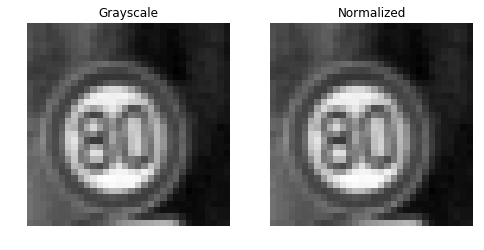

80.1636016092
82.677589037


In [8]:
# Normalize the data

X_train_normalized = ((X_train_gray - np.min(X_train_gray))*255/(np.max(X_train_gray)-np.min(X_train_gray)))
X_valid_normalized = ((X_valid_gray - np.min(X_valid_gray))*255/(np.max(X_valid_gray)-np.min(X_valid_gray)))
X_test_normalized = ((X_test_gray - np.min(X_test_gray))*255/(np.max(X_test_gray)-np.min(X_test_gray)))

#Show Image before and after grayscale
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes = axes.ravel()

axes[0].axis('off')
axes[0].set_title('Grayscale')
image_pre = X_train_gray[index].squeeze() 
axes[0].imshow(image_pre, cmap="gray")

axes[1].axis('off')
axes[1].set_title('Normalized')
image_norm = X_train_normalized[index].squeeze()
axes[1].imshow(image_norm, cmap="gray")
      
plt.show()

print(np.mean(X_train_normalized))
print(np.mean(X_train_gray))


In [9]:

#Replace color with normalized grayscale images
X_train = X_train_normalized
X_valid = X_valid_normalized
X_test = X_test_normalized

X_tv = np.concatenate((X_train, X_valid), axis=0)
y_tv = np.concatenate((y_train, y_valid), axis=0)

print("Total Images =", X_tv.shape)

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_tv, y_tv, test_size=0.15, random_state=42)

print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))


X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

Total Images = (39209, 32, 32, 1)
Training Set:   33327 samples
Validation Set: 5882 samples
Test Set:       12630 samples


### Model Architecture

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

BATCH_SIZE = 128
EPOCHS = 50
rate = 0.0005
dropout = 0.75  # Dropout, probability to keep units

from tensorflow.contrib.layers import flatten

#Utilizing LeNet architecture
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.08
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, dropout)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, dropout)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes(43).
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")


Training...

EPOCH 1 ...
Validation Accuracy = 0.515

EPOCH 2 ...
Validation Accuracy = 0.720

EPOCH 3 ...
Validation Accuracy = 0.823

EPOCH 4 ...
Validation Accuracy = 0.862

EPOCH 5 ...
Validation Accuracy = 0.889

EPOCH 6 ...
Validation Accuracy = 0.905

EPOCH 7 ...
Validation Accuracy = 0.914

EPOCH 8 ...
Validation Accuracy = 0.928

EPOCH 9 ...
Validation Accuracy = 0.929

EPOCH 10 ...
Validation Accuracy = 0.935

EPOCH 11 ...
Validation Accuracy = 0.939

EPOCH 12 ...
Validation Accuracy = 0.944

EPOCH 13 ...
Validation Accuracy = 0.951

EPOCH 14 ...
Validation Accuracy = 0.954

EPOCH 15 ...
Validation Accuracy = 0.960

EPOCH 16 ...
Validation Accuracy = 0.956

EPOCH 17 ...
Validation Accuracy = 0.954

EPOCH 18 ...
Validation Accuracy = 0.951

EPOCH 19 ...
Validation Accuracy = 0.961

EPOCH 20 ...
Validation Accuracy = 0.963

EPOCH 21 ...
Validation Accuracy = 0.959

EPOCH 22 ...
Validation Accuracy = 0.961

EPOCH 23 ...
Validation Accuracy = 0.962

EPOCH 24 ...
Validation Accura

## Evaluate Model


In [12]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.926




---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Web Images


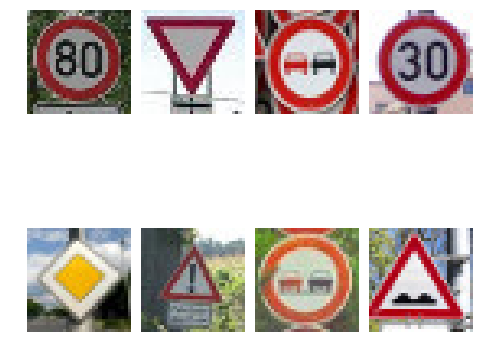

In [13]:

### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#import tensorflow as tf
#import numpy as np

print("Web Images")

%matplotlib inline

X_webimages = []

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 8))
fig.subplots_adjust(hspace=0.001, wspace=0.1)

fs = 16
i = 0


import glob
for img in glob.glob("./img/img*.jpg"):
    cv_img = cv2.imread(img)
    row = int(i/4)
    col = i%4

    X_webimages.append(cv_img)
    
    #Extract the classid embedded in the image name
    #l,y,r = img.split("__")

    #title = ("Classid: {}".format(y))
    #axes[row, col].set_title(title, fontsize=fs)
    
    axes[row, col].axis('off')
    axes[row, col].imshow(cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB))
    
    i +=1

    
X_webimages = np.asarray(X_webimages)
n_webimages = len(X_webimages)



(8, 32, 32, 1)


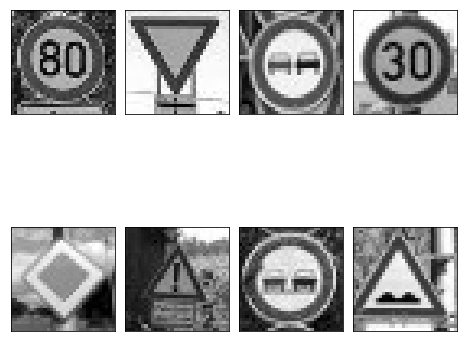

In [14]:
#Grayscale Processing
X_webimages_gray = np.mean(X_webimages, axis=3)
X_webimages_gray = np.expand_dims(X_webimages_gray, axis=3)

#Show Grayscale
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 8))
fig.subplots_adjust(hspace=0.001, wspace=0.1)
for k in range(0, n_webimages):
    image = X_webimages_gray[k].squeeze()

    row = int(k/4)
    col = k%4
    
    #title = ("Classid: {}".format(y_webimages[k]))
    #axes[row, col].set_title(title, fontsize=fs)
    axes[row, col].imshow(image, cmap="gray")

    for ax in axes.flatten():
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
print(X_webimages_gray.shape)


### Predict the Sign Type for Each Image

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.


y_webimages = [5, 13, 9, 1, 12, 18, 9, 22]
#print (y_webimages)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    
    test_accuracy = evaluate(X_webimages_gray, y_webimages)
    print("Web Images Test Accuracy = {:.3f}".format(test_accuracy))


Web Images Test Accuracy = 0.750


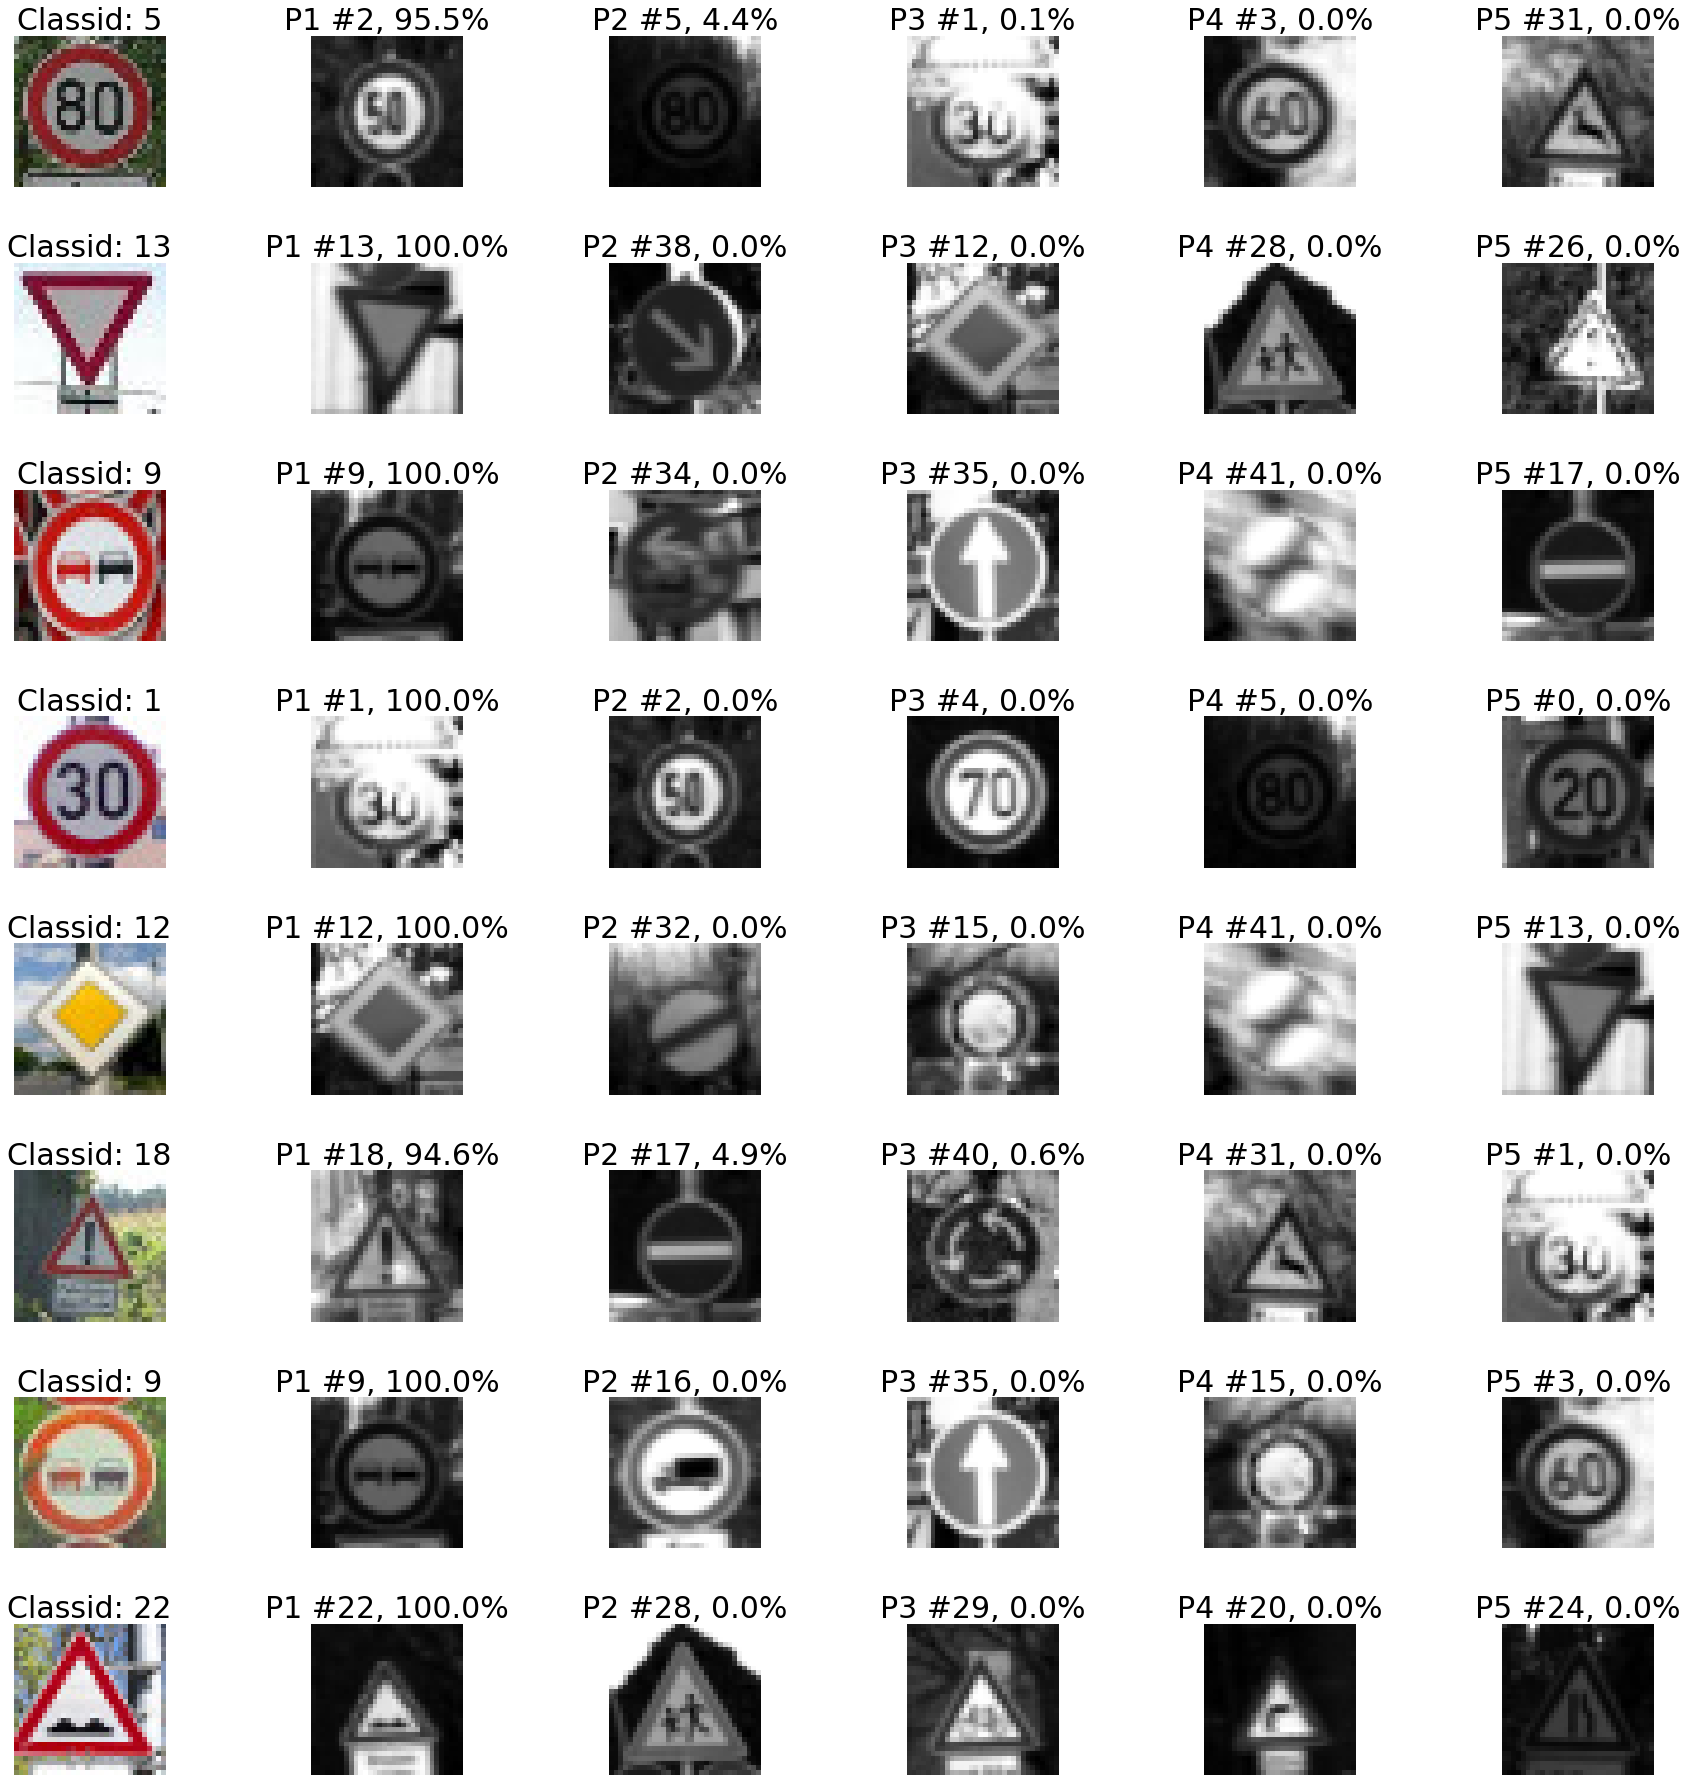

In [16]:

sm_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(sm_logits, k=5)

with tf.Session() as sess:
    
    fs = 30  # fontsize
    
    web_correct_pred = 0
    
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    
    calc_sm = sess.run(sm_logits, feed_dict={x: X_webimages_gray})
    calc_top_k = sess.run(top_k, feed_dict={x: X_webimages_gray})
    
    fig, axes = plt.subplots(nrows=8, ncols=6, figsize=(32, 32))
     
    for i in range(0, n_webimages):
        
        image = X_webimages[i].squeeze()
    
        #Predictions
    
        prediction1 = calc_top_k[1][i][0]
        index1 = np.where(y_train==prediction1)
        index1 = int(index1[0][0])
        image1 = X_train[index1].squeeze()
        certainty1 = (calc_top_k[0][i][0] * 100)
        
        prediction2 = calc_top_k[1][i][1]
        index2 = np.where(y_train==prediction2)
        index2 = int(index2[0][0])
        image2 = X_train[index2].squeeze()
        certainty2 = (calc_top_k[0][i][1] * 100)
        
        prediction3 = calc_top_k[1][i][2]
        index3 = np.where(y_train==prediction3)
        index3 = int(index3[0][0])
        image3 = X_train[index3].squeeze()
        certainty3 = (calc_top_k[0][i][2] * 100)
        
        prediction4 = calc_top_k[1][i][3]
        index4 = np.where(y_train==prediction4)
        index4 = int(index4[0][0])
        image4 = X_train[index4].squeeze()
        certainty4 = (calc_top_k[0][i][3] * 100)
        
        prediction5 = calc_top_k[1][i][4]
        index5 = np.where(y_train==prediction5)
        index5 = int(index5[0][0])
        image5 = X_train[index5].squeeze()
        certainty5 = (calc_top_k[0][i][4] * 100)
        
       
        if (y_webimages[i] == prediction1):
            web_correct_pred += 1
          
        axes[i, 0].imshow(cv2.cvtColor(X_webimages[i], cv2.COLOR_BGR2RGB))     
        axes[i, 0].set_title('Classid: {}'.format(y_webimages[i]), fontsize=fs)
        axes[i, 0].axis('off')
        
        #First Prediction
        axes[i, 1].imshow(image1, cmap="gray")
        axes[i, 1].set_title('P1 #{}, {:.1f}%'.format(prediction1, certainty1), fontsize=fs)
        axes[i, 1].axis('off')
        
        #Second Prediction
        axes[i, 2].imshow(image2, cmap="gray")
        axes[i, 2].set_title('P2 #{}, {:.1f}%'.format(prediction2, certainty2), fontsize=fs)
        axes[i, 2].axis('off')

        #Third Prediction
        axes[i, 3].imshow(image3, cmap="gray")
        axes[i, 3].set_title('P3 #{}, {:.1f}%'.format(prediction3, certainty3), fontsize=fs)
        axes[i, 3].axis('off')

        #Fourth Prediction
        axes[i, 4].imshow(image4, cmap="gray")
        axes[i, 4].set_title('P4 #{}, {:.1f}%'.format(prediction4, certainty4), fontsize=fs)
        axes[i, 4].axis('off')

        #Fifth Prediction
        axes[i, 5].imshow(image5, cmap="gray")
        axes[i, 5].set_title('P5 #{}, {:.1f}%'.format(prediction5, certainty5), fontsize=fs)
        axes[i, 5].axis('off')
        
        
        for ax in axes.flatten():
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        
    fig.subplots_adjust(wspace=0.001, hspace=0.5)



### Analyze Performance

In [17]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
web_accuracy = ((web_correct_pred / n_webimages) * 100)

print("Prediction Accuracy of Web Images = {:.1f}%".format(web_accuracy))

Prediction Accuracy of Web Images = 87.5%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [18]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign 
### images found on the web. 
### Feel free to use as many code cells as needed.

In [19]:
  
sm_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(sm_logits, k=5)

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    
    calc_sm = sess.run(sm_logits, feed_dict={x: X_webimages_gray})
    calc_top_k = sess.run(top_k, feed_dict={x: X_webimages_gray})
   
   
    for i in range(0, n_webimages):
        print ("Classid: {}".format(y_webimages[i]))
        
        for ii in range(0, 5):
            print ("Prediction:{} Certainty:{:.2f}%".format(calc_top_k[1][i][ii], (calc_top_k[0][i][ii])*100))
        
        print();


Classid: 5
Prediction:5 Certainty:40.03%
Prediction:8 Certainty:28.72%
Prediction:4 Certainty:17.99%
Prediction:33 Certainty:4.96%
Prediction:1 Certainty:3.57%

Classid: 13
Prediction:13 Certainty:100.00%
Prediction:2 Certainty:0.00%
Prediction:12 Certainty:0.00%
Prediction:33 Certainty:0.00%
Prediction:40 Certainty:0.00%

Classid: 9
Prediction:9 Certainty:100.00%
Prediction:41 Certainty:0.00%
Prediction:32 Certainty:0.00%
Prediction:40 Certainty:0.00%
Prediction:16 Certainty:0.00%

Classid: 1
Prediction:1 Certainty:100.00%
Prediction:2 Certainty:0.00%
Prediction:0 Certainty:0.00%
Prediction:5 Certainty:0.00%
Prediction:4 Certainty:0.00%

Classid: 12
Prediction:12 Certainty:100.00%
Prediction:13 Certainty:0.00%
Prediction:25 Certainty:0.00%
Prediction:41 Certainty:0.00%
Prediction:11 Certainty:0.00%

Classid: 18
Prediction:40 Certainty:98.89%
Prediction:18 Certainty:1.11%
Prediction:1 Certainty:0.00%
Prediction:17 Certainty:0.00%
Prediction:31 Certainty:0.00%

Classid: 9
Prediction:9 C

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 